## 06_01 --> #6 Getting Started with Machine Learning
## Cleaning and treating categorical variables

In [3]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 19.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
from pandas import DataFrame

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [5]:
data = {'names':['steve', 'john', 'richard', 'sarah', 'randy', 'micheal', 'julie'],
'age':[20, 22, 20, 21, 24, 23, 22],
'gender':['Male', 'Male', np.nan, 'Female', np.nan, 'Male', np.nan],
'rank':[2, 1, 4, 5, 3, 7, 6]}

df= DataFrame(data)
df


,names,age,gender,rank
0,steve,20,Male,2
1,john,22,Male,1
2,richard,20,NaN,4
3,sarah,21,Female,5
4,randy,24,NaN,3
5,micheal,23,Male,7
6,julie,22,NaN,6


In [6]:
df = df.drop('gender', axis=1)
df

,names,age,rank
0,steve,20,2
1,john,22,1
2,richard,20,4
3,sarah,21,5
4,randy,24,3
5,micheal,23,7
6,julie,22,6


### Label Encoding

In [7]:
label_encoder = LabelEncoder()
label_encoder.fit(df['names'])

LabelEncoder()

In [8]:
label_encoded_names = label_encoder.transform(df['names'])
label_encoded_names

array([6, 0, 4, 5, 3, 2, 1])

In [9]:
onehot_encoder = OneHotEncoder(sparse_output=False)

In [10]:
onehot_encoder.fit(df[['names']])

OneHotEncoder(sparse_output=False)

In [13]:
onehot_encoded_names = onehot_encoder.transform(df[['names']])

In [14]:
onehot_encoded_df = DataFrame(onehot_encoded_names, columns=onehot_encoder.categories_)
onehot_encoded_df['names'] = df[['names']]
onehot_encoded_df

,john,julie,micheal,randy,richard,sarah,steve,names
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,steve
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,john
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,richard
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,sarah
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,randy
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,micheal
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,julie


## 06_02
## Transforming Dataset Distributions

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale

In [16]:
#address = '/workspaces/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'
address = './data/mtcars.csv'

dataset = pd.read_csv(address)
dataset.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


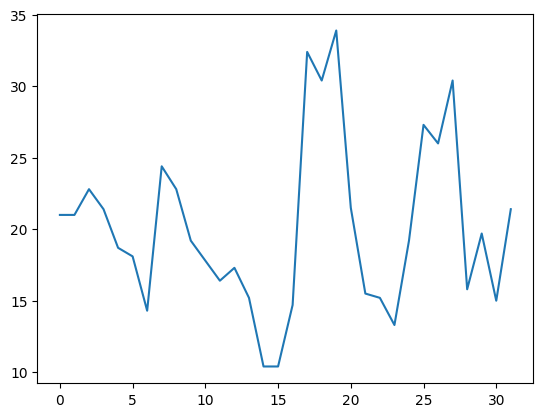

In [17]:
plt.plot(dataset[['mpg']])

### Normalization

In [18]:
minmax_scalar = MinMaxScaler()
minmax_scalar.fit(dataset[['mpg']])

MinMaxScaler()

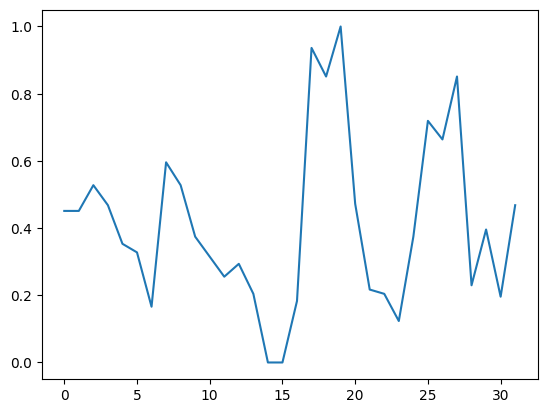

In [19]:
scaled_data = minmax_scalar.transform(dataset[['mpg']])
plt.plot(scaled_data)

### Standardization

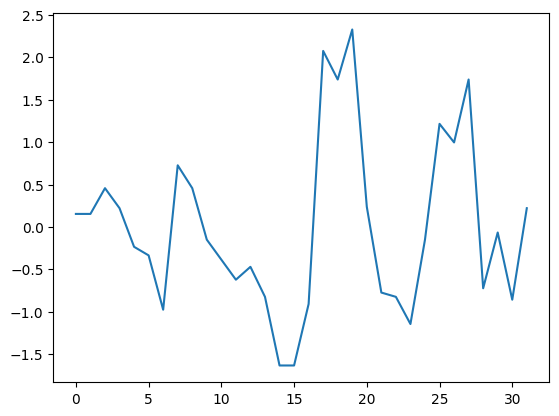

In [20]:
standard_scalar = scale(dataset[['mpg']])
plt.plot(standard_scalar)

## 06_03
## Applied Machine Learning: Starter Problem

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [4]:
#address = '/workspaces/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/iris.csv'
address = './data/iris.csv'

dataset = pd.read_csv(address)
dataset.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [13]:
dataset.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
# just checking
# Sepal.Length Sepal.Width Petal.Length Petal.Width	
dataset['Sepal.Length'].unique()
dataset['Sepal.Width'].unique()
dataset['Petal.Length'].unique()
dataset['Petal.Width'].unique()


array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

### Separating features and labels

In [15]:
X = dataset.iloc[:,1:5]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y = dataset.iloc[:,5]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Training Decision Tree Classifier

In [18]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
y_predict = clf.predict(X_test)
y_predict

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa'], dtype=object)

### Evaluation metric

In [20]:
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777
